In [1]:
rm(list=ls())

# Platform info
cat(paste('OS:', R.Version()$system, 
          '\nCPU cores:', parallel::detectCores(), 
          gsub('R version', '\nR version:', R.Version()$version.string)))

OS: x86_64, mingw32 
CPU cores: 8 
R version: 4.2.1 (2022-06-23 ucrt)

In [2]:
library(data.table)
library(ggplot2)

# global settings
options(repr.plot.width=16, repr.plot.height=6)

# Data Similation

https://kevinkotze.github.io/ts-2-tut/

[1] 312   3


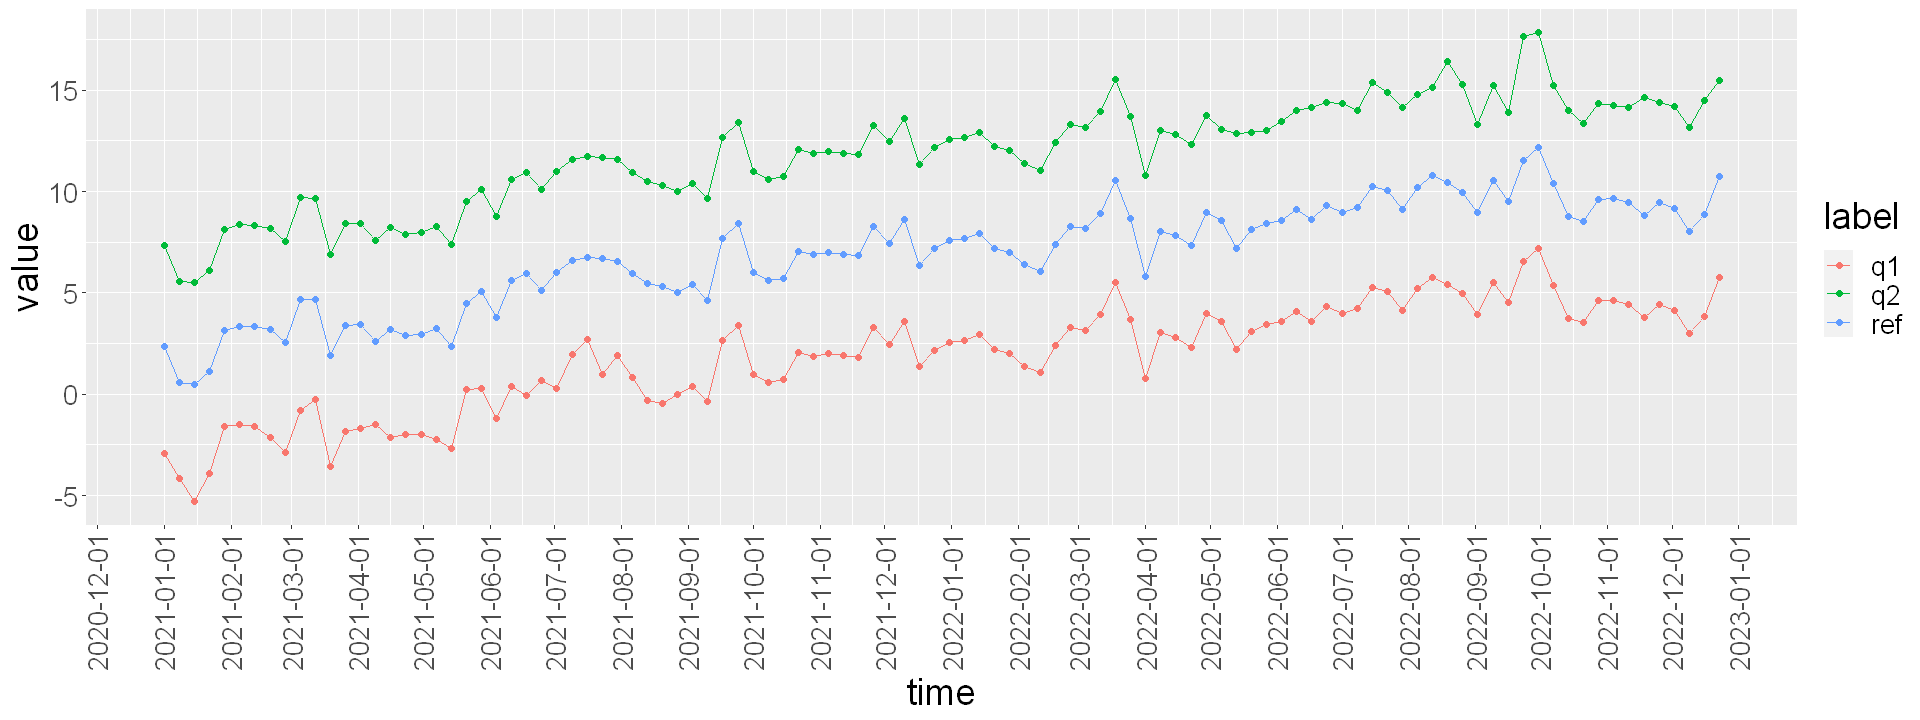

In [3]:
set.seed(123)
n_wk <- 104 # weeks in two years 
date_label <- seq(as.Date("2021/1/1"), by = "week", length.out = n_wk)
ts <- arima.sim(model = list(ar = 0.2, ma = 0.3), n = n_wk) + sqrt(1:n_wk)
e <- rnorm(n_wk, 0, 1)

dt_refer <- ts
dt_query1 <- c(ts[1:34] - 5 + e[1:34]*0.5, 
               ts[35:69] - 5,
               ts[70:104] - 5)
dt_query2 <- c(ts[1:34] + 5, 
               ts[35:69] + 5,
               ts[70:104] + 5 + e[70:104]*0.5)

dt <- data.table(time=rep(date_label, 3), label=c(rep(c('ref', 'q1', 'q2'), each=n_wk)), 
                 value=c(dt_refer, dt_query1, dt_query2))
print(dim(dt))

ggplot(data=dt, aes(x=time, y=value, color=label)) + geom_point() + geom_line() + 
scale_x_date(breaks="1 month") + theme(
    axis.text.x=element_text(angle=90, vjust=0.5, hjust=1),
    axis.title=element_text(size=22), axis.text=element_text(size=16), 
    legend.title=element_text(size=22), legend.text=element_text(size=16))